<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [5]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [6]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [7]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.


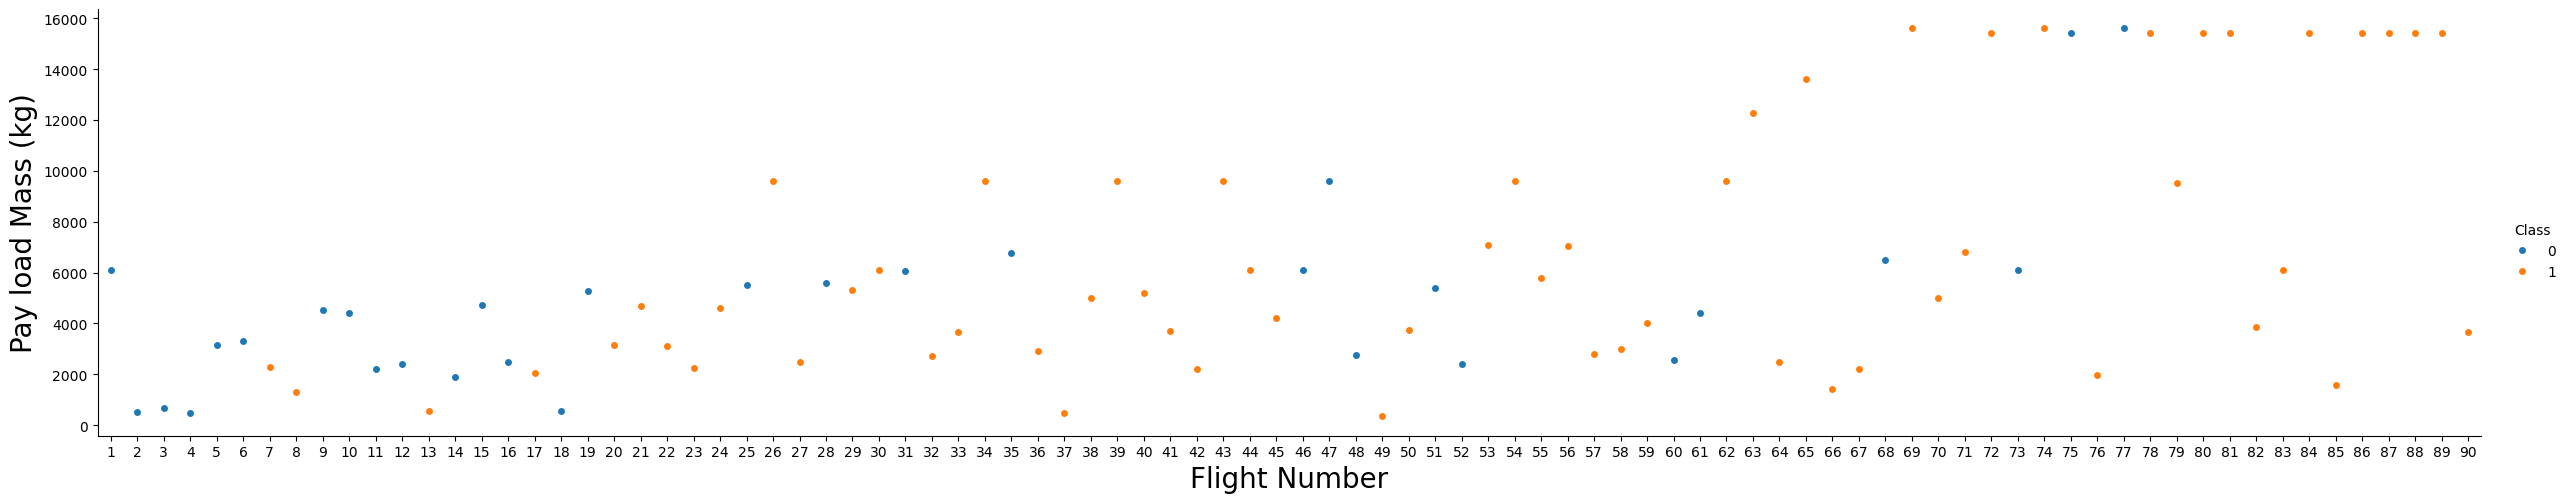

In [8]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


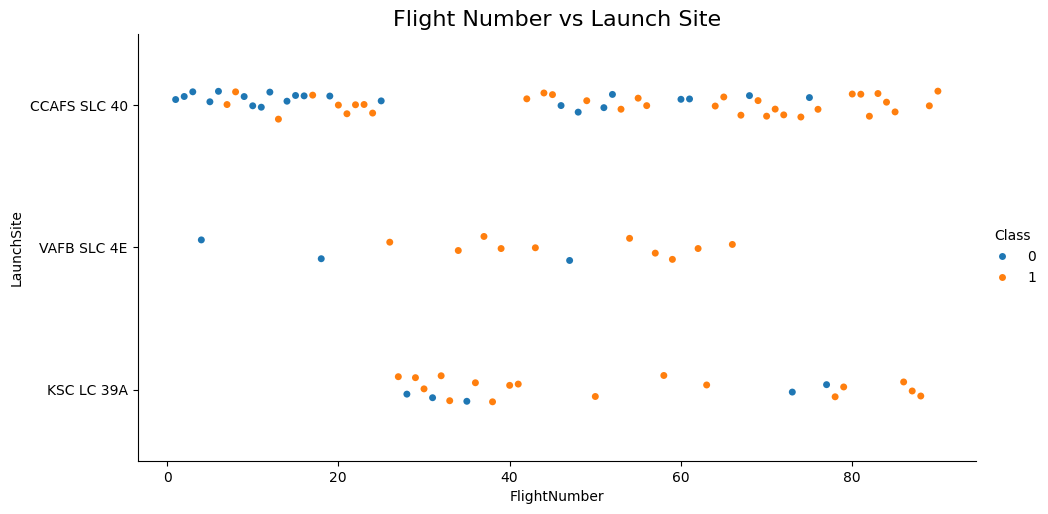

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure column names are correct (replace if needed)
# If your dataset has 'Class' instead of 'class', adjust hue parameter
sns.catplot(
    x="FlightNumber",
    y="LaunchSite",
    hue="Class",   # or 'class' if your column is lowercase
    data=df,
    aspect=2,
    height=5
)

plt.title("Flight Number vs Launch Site", fontsize=16)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload Mass and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


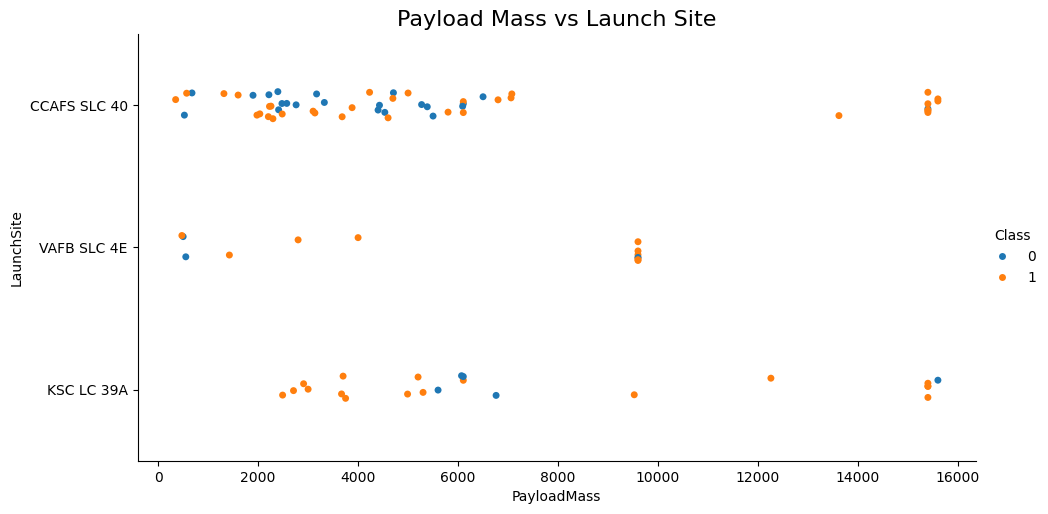

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of Payload Mass vs Launch Site, colored by class
sns.catplot(
    x="PayloadMass",    # If your column is 'PayloadMass(kg)', replace this name
    y="LaunchSite",
    hue="Class",        # Or 'class' if lowercase
    data=df,
    aspect=2,
    height=5
)

plt.title("Payload Mass vs Launch Site", fontsize=16)
plt.show()


Now if you observe Payload Mass Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


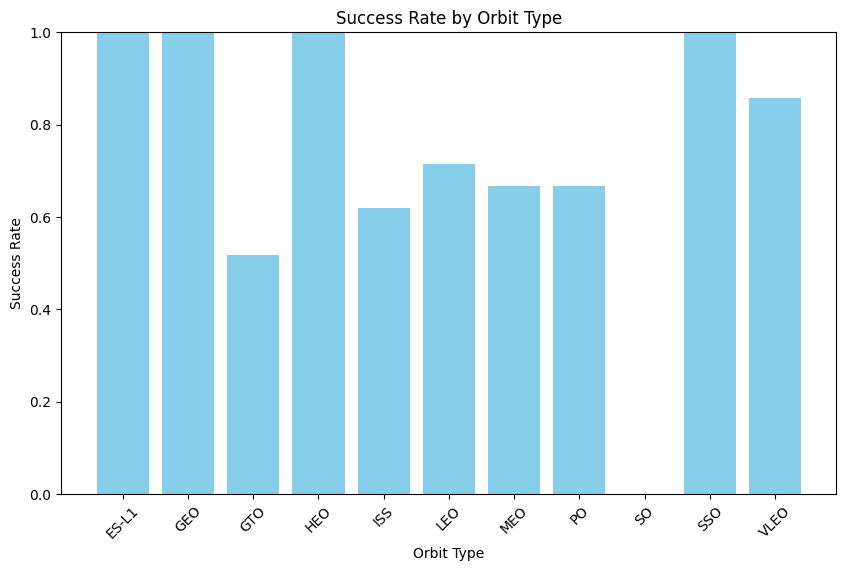

In [11]:
import matplotlib.pyplot as plt

# Group by Orbit and calculate the mean success rate
orbit_success = df.groupby('Orbit')['Class'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(10,6))
plt.bar(orbit_success['Orbit'], orbit_success['Class'], color='skyblue')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.title('Success Rate by Orbit Type')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # since success rate is between 0 and 1
plt.show()

Analyze the plotted bar chart to identify which orbits have the highest success rates.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


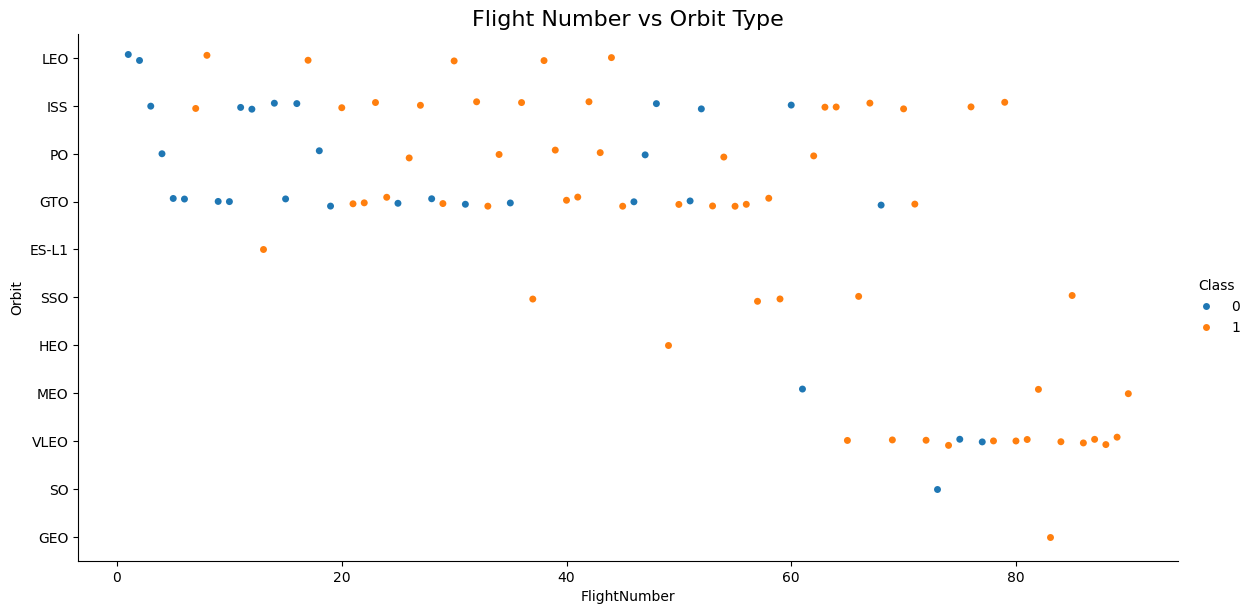

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: Flight Number vs Orbit, color-coded by Class
sns.catplot(
    x="FlightNumber",
    y="Orbit",
    hue="Class",   # change to 'class' if your column is lowercase
    data=df,
    aspect=2,
    height=6
)

plt.title("Flight Number vs Orbit Type", fontsize=16)
plt.show()


You can observe that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.


### TASK  5: Visualize the relationship between Payload Mass and Orbit type


Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type


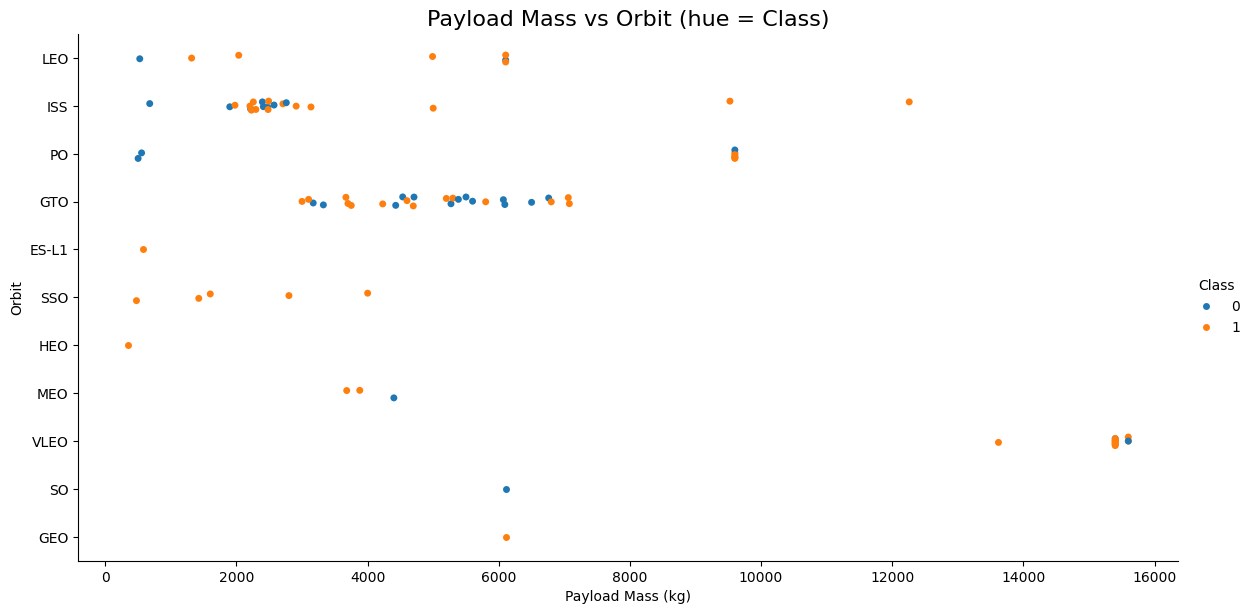

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pick the correct payload column name in your df
payload_col = ("PayloadMass" if "PayloadMass" in df.columns 
               else "Payload_Mass__kg_" if "Payload_Mass__kg_" in df.columns 
               else "PayloadMass(kg)")

sns.catplot(
    x=payload_col,
    y="Orbit",
    hue=("Class" if "Class" in df.columns else "class"),
    data=df,
    aspect=2,
    height=6
)

plt.title("Payload Mass vs Orbit (hue = Class)", fontsize=16)
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Orbit")
plt.show()


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.


### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


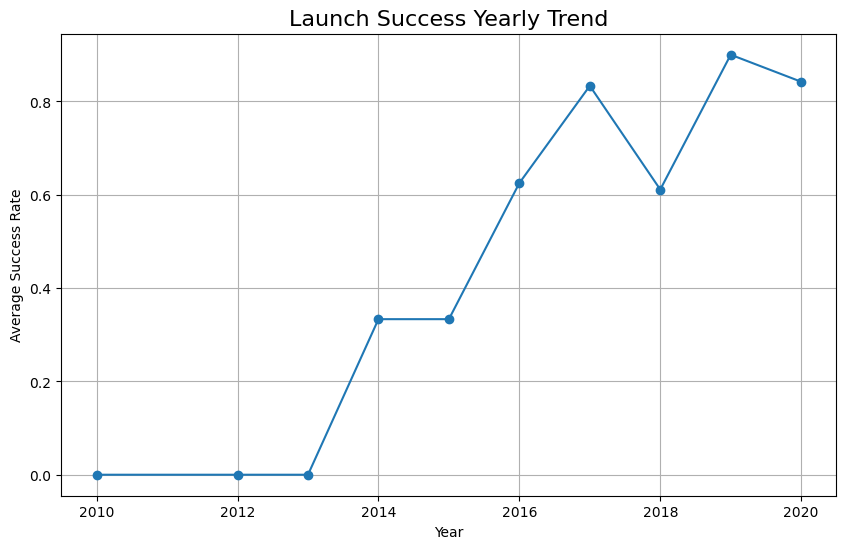

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract the year from Date column
df['Year'] = df['Date'].dt.year

# Calculate the yearly average success rate
yearly_success = df.groupby('Year')['Class'].mean().reset_index()

# Plot the success rate trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_success['Year'], yearly_success['Class'], marker='o', linestyle='-')
plt.title('Launch Success Yearly Trend', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Success Rate')
plt.grid(True)
plt.show()

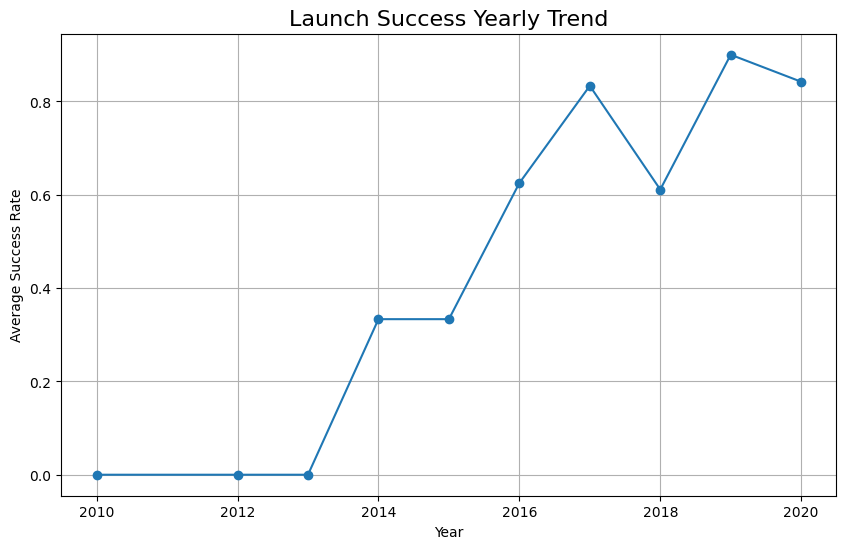

In [16]:
# Plot a line chart with x axis = extracted year and y axis = success rate
yearly_success = df.groupby('Year')['Class'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_success['Year'], yearly_success['Class'], marker='o', linestyle='-')
plt.title('Launch Success Yearly Trend', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Success Rate')
plt.grid(True)
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [18]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [19]:
# Apply one-hot encoding to the categorical columns
features_one_hot = pd.get_dummies(
    features, 
    columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial']
)

# Display the first few rows
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers, cast the entire dataframe to variable type <code>float64</code>


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log-->


<!--
| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|
| 2024-07-18        | 1.2     | Anita Verma | Clarified instructions|
-->


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>


# SpaceX EDA & Data Visualization — **Solved Version**
This notebook loads the processed dataset, ensures required columns exist, and produces the plots and aggregates typically requested in the assignment.

**What this adds:**
- Robust data loading (local CSV first, then fallback URL)
- Date parsing and `Class` creation if missing
- Visualizations: launches by site, orbits, outcomes, success rates by site/orbit, payload vs. outcome
- Summary tables for quick reference

## 1) Setup

In [ ]:
import os
import io
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Inline plots
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 120)


## 2) Load data
We try `dataset_part_2.csv` created in the previous lab. If not found, we fall back to the public SpaceX CSV and minimally align columns.

In [ ]:
# Primary (from previous lab)
local_candidates = [
    "dataset_part_2.csv",
    "/mnt/data/dataset_part_2.csv",
    "SpaceX_launch_data.csv",
    "/mnt/data/SpaceX_launch_data.csv"
]

df = None
for p in local_candidates:
    if os.path.exists(p):
        try:
            df = pd.read_csv(p)
            print(f"Loaded: {p}")
            break
        except Exception as e:
            print(f"Failed loading {p}: {e}")

# Fallback to public dataset if needed
if df is None:
    url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv"
    df = pd.read_csv(url)
    print("Loaded fallback URL dataset.")

# Normalize column names for consistency (trim spaces)
df.columns = [c.strip() for c in df.columns]

# Show a preview
df.head(5)

## 3) Ensure `Date` is datetime and create `Class` if missing
- `Class` = 1 if successful landing (True ASDS / True RTLS / True Ocean), 0 otherwise.

In [ ]:
# Parse Date if needed
date_col = "Date" if "Date" in df.columns else ("date" if "date" in df.columns else None)
if date_col:
    df["Date"] = pd.to_datetime(df[date_col])
else:
    # try to build a Date column if pieces exist
    if {"year","month","day"}.issubset(set(df.columns)):
        df["Date"] = pd.to_datetime(df[["year","month","day"]])
    else:
        # last resort: leave as-is
        pass

# Outcome column harmonization: some datasets use 'Outcome', others 'Landing_Outcome'
if "Outcome" in df.columns:
    outcome_col = "Outcome"
elif "Landing_Outcome" in df.columns:
    outcome_col = "Landing_Outcome"
else:
    # Create an Outcome if mission outcome-like column exists
    candidates = [c for c in df.columns if "Outcome" in c or "landing" in c.lower()]
    outcome_col = candidates[0] if candidates else None

# Build Class if not present
if "Class" not in df.columns and outcome_col is not None:
    success_labels = {"True ASDS", "True RTLS", "True Ocean", "Success", "Success (drone ship)", "Success (ground pad)"}
    df["Class"] = df[outcome_col].isin(success_labels).astype(int)

df.head(5)

## 4) Quick summaries

In [ ]:
print("Rows:", len(df))
print("Columns:", len(df.columns))
print("\nColumns:", df.columns.tolist())

print("\nMissing % by column:")
display((df.isnull().sum()/len(df)*100).round(2))

# Basic value counts
site_col = "LaunchSite" if "LaunchSite" in df.columns else ("Launch_Site" if "Launch_Site" in df.columns else None)
orbit_col = "Orbit" if "Orbit" in df.columns else None

if site_col:
    print("\nLaunches by site:")
    display(df[site_col].value_counts())

if orbit_col:
    print("\nOrbits:")
    display(df[orbit_col].value_counts())

if outcome_col:
    print("\nOutcomes:")
    display(df[outcome_col].value_counts())

if "Class" in df.columns:
    print("\nSuccess rate (Class mean):", round(df["Class"].mean()*100, 2), "%")

## 5) Visualizations

In [ ]:
# Helper plotting function: safe bar plot
def bar_plot_from_counts(counts, title, xlabel, ylabel="Count", rotation=0):
    plt.figure(figsize=(8,4))
    ax = counts.plot(kind="bar")
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.tight_layout()
    plt.show()

# Launches by site
if site_col:
    bar_plot_from_counts(df[site_col].value_counts(), "Launches by Site", "Launch Site", rotation=15)

# Outcomes (raw)
if outcome_col:
    bar_plot_from_counts(df[outcome_col].value_counts(), "Landing Outcomes (All Data)", "Outcome", rotation=25)

# Orbits
if orbit_col:
    bar_plot_from_counts(df[orbit_col].value_counts(), "Orbits (All Data)", "Orbit", rotation=25)

# Success rate by site
if site_col and "Class" in df.columns:
    by_site = df.groupby(site_col)["Class"].mean().sort_values(ascending=False)
    bar_plot_from_counts(by_site, "Success Rate by Launch Site", "Launch Site", ylabel="Success Rate (Mean Class)", rotation=15)

# Success rate by orbit
if orbit_col and "Class" in df.columns:
    by_orbit = df.groupby(orbit_col)["Class"].mean().sort_values(ascending=False)
    bar_plot_from_counts(by_orbit, "Success Rate by Orbit", "Orbit", ylabel="Success Rate (Mean Class)", rotation=25)

# Payload vs. Class scatter (if available)
payload_col = "PayloadMass" if "PayloadMass" in df.columns else ("Payload_Mass__kg_" if "Payload_Mass__kg_" in df.columns else None)
if payload_col and "Class" in df.columns:
    plt.figure(figsize=(6,4))
    plt.scatter(df[payload_col], df["Class"])
    plt.title("Payload vs. Landing Success (Class)")
    plt.xlabel("Payload Mass (kg)")
    plt.ylabel("Class (0=Fail, 1=Success)")
    plt.tight_layout()
    plt.show()

## 6) Task 10 — Rank outcomes between **2010-06-04** and **2017-03-20**

In [ ]:
start_date = pd.to_datetime("2010-06-04")
end_date   = pd.to_datetime("2017-03-20")

if "Date" in df.columns and outcome_col:
    m = (df["Date"] >= start_date) & (df["Date"] <= end_date)
    dfx = df.loc[m].copy()
    ranked = dfx[outcome_col].value_counts().reset_index()
    ranked.columns = [outcome_col, "Count"]
    ranked = ranked.sort_values("Count", ascending=False).reset_index(drop=True)
    display(ranked)
else:
    print("Missing 'Date' or outcome column to perform Task 10.")

## 7) (Optional) Export a cleaned dataset for grading consistency

In [ ]:
export_cols = [c for c in ["Date", site_col, orbit_col, outcome_col, "Class", payload_col] if c]
clean_export = df[export_cols].copy()
clean_export.to_csv("dataset_edadataviz_clean.csv", index=False)
print("Saved: dataset_edadataviz_clean.csv")